See AMI between patch-labels from several trained models 

The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative.

In [1]:
%matplotlib inline
import os
import sys
import copy
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_swath, _load_tif_data
from analysis_lib import _get_colors, _gen_patches, _anl_agl
from analysis_lib import cluster_plotting2, cluster_plotting

In [18]:
from sklearn.metrics import adjusted_mutual_info_score as ami

In [50]:
import copy

In [10]:
gee_datadir = '/home/tkurihana/scratch-midway2/data/GEE'
swath_filename = '2017-01-01_MOD09GA_mixed-cell.tif'
swath1 = _get_swath(gee_datadir, swath_filename)

 Shape  (2219, 4991, 7)


### Ricardo model

In [13]:
model_dir = "/home/tkurihana/clouds/output/m9-22_oceans/"
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_ric = tf.keras.models.model_from_json(f.read())
encoder_ric.load_weights(ENCODER_WEIGHTS)

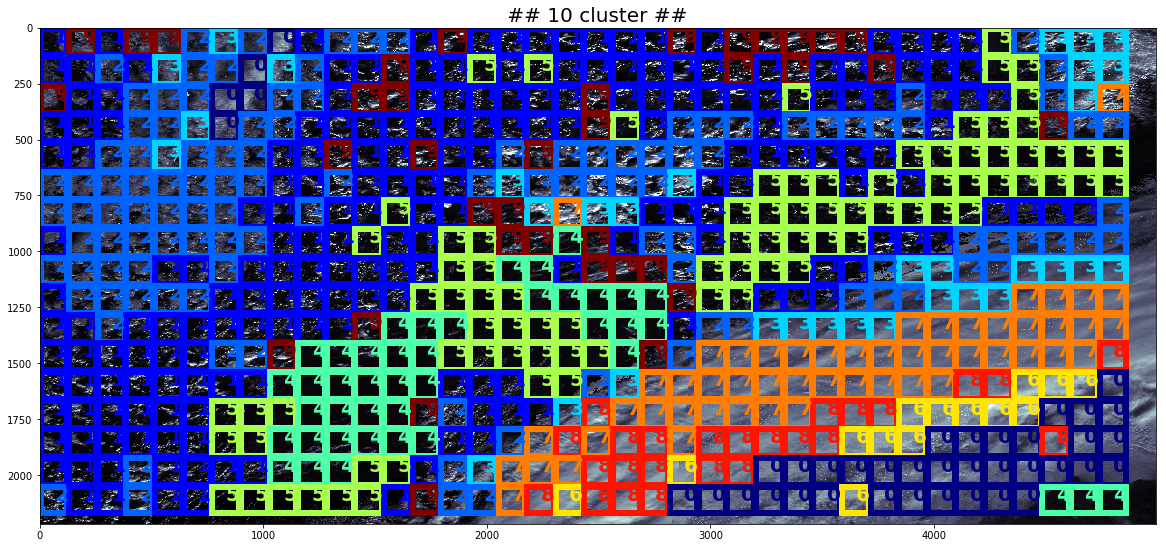

In [14]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    _patches_labels = _anl_agl(encoder_ric, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    cluster_plotting(swath1, patches,_patches_labels, SHAPE, colors, ncluster=icluster)

### Functionnize dataflow 
Through process from Load encoder to Genetate patch-labels

In [12]:
m9_22_dir_list=[
    '/project/foster/clouds/output/m9_22_Global_DJF_2015_2016/',
    '/project/foster/clouds/output/m9_22_Global_JJA_2015_2016/',
    '/project/foster/clouds/output/m9_22_Global_ALL_2015_2016/'
]

In [5]:
m9_24_dir_list=[
    '/project/foster/clouds/output/m9_24_Global_ALL_JJA_2015/'
]

In [29]:
m9_25_dir_list=[
    '/project/foster/clouds/output/m9_24_Global_DJF_2015_2016/'
]
# iteration 3times but amount of data is equal to m9_24

In [15]:
def _get_swath_patches(swath1, model_dir='./', ):
    # encoder part
    ENCODER_DEF=model_dir+'encoder.json'
    ENCODER_WEIGHTS=model_dir+'encoder-160000.h5'
    with open(ENCODER_DEF,"r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(ENCODER_WEIGHTS)
    
    # patches part
    SHAPE = 128, 128, 7
    patches = _gen_patches(swath1, normalization=True)
    for icluster in [10]:
        _patches_labels = _anl_agl(encoder, patches, clusters=icluster)
    return _patches_labels

In [16]:
m9_22_labels = []
for idir in m9_22_dir_list:
    m9_22_labels +=[ _get_swath_patches(swath1, model_dir=idir) ]

In [17]:
m9_24_labels = []
for idir in m9_24_dir_list:
    m9_24_labels +=[ _get_swath_patches(swath1, model_dir=idir) ]

In [23]:
mymodels = m9_22_labels + m9_24_labels

In [45]:
amis = []
ric_label = _patches_labels.flatten()
for imodel in mymodels:
    amis +=[ ami(ric_label, imodel.flatten()) ]

In [46]:
amis

[0.7356508265871619,
 0.7784014427450179,
 0.7375380651094845,
 0.7587462024320486]

### m9_25 caase

In [31]:
model_dir = "/project/foster/clouds/output/m9_24_Global_DJF_2015_2016/"
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-595000.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_tak = tf.keras.models.model_from_json(f.read())
encoder_tak.load_weights(ENCODER_WEIGHTS)

In [32]:
patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    tak_labels = _anl_agl(encoder_tak, patches, clusters=icluster)

#### amis ricardo vs m9_25

In [33]:
ami(ric_label, tak_labels.flatten())

0.56612636921557

In [48]:
_ami = ami(ric_label, tak_labels.flatten())

In [59]:
_amis = copy.deepcopy(amis)

In [60]:
_amis

[0.7356508265871619,
 0.7784014427450179,
 0.7375380651094845,
 0.7587462024320486]

In [61]:
_amis.append(_ami)

In [64]:
len(_amis)

5

<BarContainer object of 5 artists>

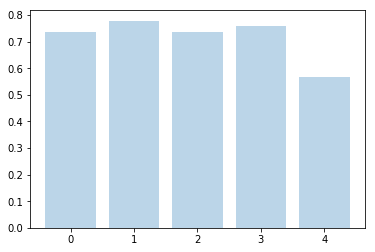

In [66]:
plt.bar([i for i in range(len(_amis))], _amis, alpha=0.3)

Text(0.5, 1.0, 'AMI Score among trained models')

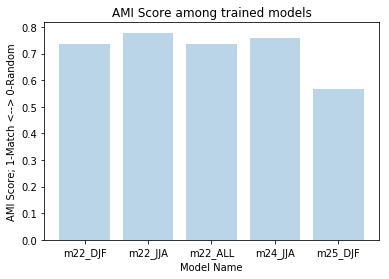

In [71]:
plt.bar([i for i in range(len(_amis))], _amis, alpha=0.3)
plt.xticks([i for i in range(len(_amis))],
          ['m22_DJF', 'm22_JJA','m22_ALL','m24_JJA', 'm25_DJF',]
          )
plt.xlabel("Model Name")
plt.ylabel("AMI Score; 1-Match <--> 0-Random")
plt.title("AMI Score among trained models")

In [73]:
model_dir='/project/foster/clouds/output/m9_26_Global_June_2015_2016/'
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-10000.h5'
with open(ENCODER_DEF,"r") as f:
    _encoder = tf.keras.models.model_from_json(f.read())
_encoder.load_weights(ENCODER_WEIGHTS)

In [76]:
_encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 128, 128, 7)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 1024        encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   2320        leaky_re_lu[0][0]                
__________________________________________________________________________________________________
leaky_re_l

In [74]:
__patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    __patches_labels = _anl_agl(_encoder, __patches, clusters=icluster)

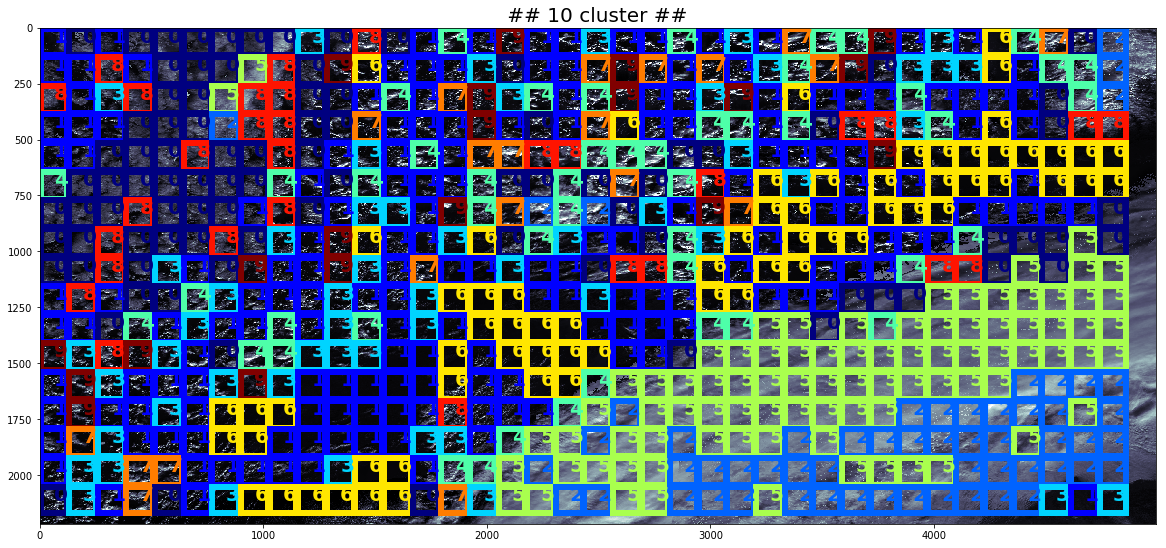

In [77]:
cluster_plotting(swath1, __patches,__patches_labels, SHAPE, colors, ncluster=10)